In [133]:

import numpy as np
import pandas as pd
import copy
import random
import matplotlib.pyplot as plt
keyfacial_df_copy= pd.read_csv('C://Users//Jesus//Desktop//CursoIA//TIMBIRICHE//ProyectoIA//datasets_proyectos//datasets_proyectos//puntos_faciales//data.csv')


# Definir una función para convertir la cadena de caracteres a una matriz numpy con forma (96, 96)
def string_to_array(image_string):
    image_array = np.fromstring(image_string, dtype=int, sep=' ')
    return image_array.reshape(96, 96)
# Aplicar la función a cada elemento de la columna 'Image' usando apply
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(string_to_array)

# 1. Voltear horizontalmente las imágenes
# Dado que estamos volteando horizontalmente, los valores de la coordenada y serían los mismos.
# Solo cambiarían los valores de la coordenada x, todo lo que tenemos que hacer es restar nuestros valores iniciales de la coordenada x del ancho de la imagen (96)
def rotar_espejo(imagen):
    # Voltea la imagen en modo espejo horizontalmente
    imagen_volteada = np.fliplr(imagen)
    return imagen_volteada


def rotar_imagen(imagen):
    # Voltea la imagen en modo espejo
    image_mirror = cv2.flip(imagen, 1)
    return image_mirror

# 3. Aumentar aleatoriamente el brillo de las imágenes
def aumentar_brillo_dataset(keyfacial_df_copy):
    df_copy = keyfacial_df_copy.copy()
    def aumentar_brillo(imagen):
        factor_brillo = random.uniform(1.5, 2)
        imagen_aumentada = np.clip(imagen * factor_brillo, 0.0, 255.0)
        return imagen_aumentada
    df_copy['Image'] = df_copy['Image'].apply(aumentar_brillo)
    return df_copy


# 4. Decrementar aleatoriamente el brillo de las imágenes
def decrementar_brillo_dataset(keyfacial_df_copy):
    df_copy = keyfacial_df_copy.copy()
    def decrementar_brillo(imagen):
        factor_brillo = random.uniform(0, 1)
        imagen_decrementada = np.clip(imagen * factor_brillo, 0.0, 255.0)
        return imagen_decrementada
    df_copy['Image'] = df_copy['Image'].apply(decrementar_brillo)
    return df_copy


# 5. Agregar ruido
def agregar_ruido_dataset(keyfacial_df_copy):
    df_copy = keyfacial_df_copy.copy()
    def agregar_ruido(img):
        noise = np.random.randint(low=0, high=255, size=img.shape)
        factor = 0.25
        img_with_noise = img + (noise * factor)
        img_with_noise = np.clip(img_with_noise, 0, 255)
        return img_with_noise
    df_copy['Image'] = df_copy['Image'].apply(agregar_ruido)
    return df_copy


In [134]:
# 1. Prueba horizontal -- FUNCIONA
# Ejemplo de uso
random_row = keyfacial_df_copy.sample()
imagen = random_row['Image'].values[0]
print(type(imagen))
print (imagen)
imgro = rotar_espejo(imagen)

<class 'numpy.ndarray'>
[[138 124 107 ... 110 115  91]
 [128 110 112 ... 106 117  97]
 [124 112  91 ... 113 117 111]
 ...
 [200 208 210 ... 135 129 115]
 [212 215 222 ... 127 134 137]
 [221 222 225 ... 137 134 132]]


In [116]:
# 2. Prueba rotar aleatorio -- FUNCIONA
df_copyr= keyfacial_df_copy
random_row = df_copyr.sample()
imgr = random_row['Image'].values[0]
imgr =rotar_imagen(imgr)

In [3]:
# 3. Aumentar el brillo -- FUNCIONA
df_copyab=aumentar_brillo_dataset(keyfacial_df_copy)
random_row = df_copyab.sample()
imgab = random_row['Image'].values[0]

In [11]:
# 4. Decrementar el brillo -- FUNCIONA
df_copydb=decrementar_brillo_dataset(keyfacial_df_copy)

random_row = df_copydb.sample()
imgdb = random_row['Image'].values[0]

In [54]:
# 5. Imagen borrosa -- FUNCIONA
df_copyb = agregar_ruido_dataset(keyfacial_df_copy)
random_row = keyfacial_df_copy.sample()
imgb = random_row['Image'].values[0]

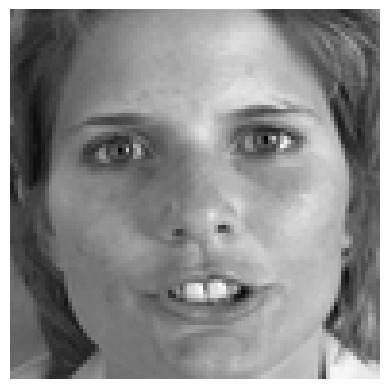

In [135]:
plt.imshow(imgro, cmap='gray')
plt.axis('off')  # Ocultar ejes
plt.show()